<div class="row">
  <div class="col-xs-6 col-md-3">
      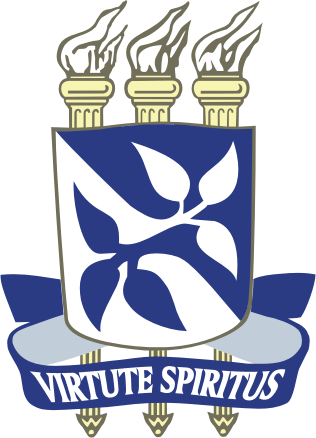</img>
  </div>
  <div class="col-xs-6 col-md-5">
        <p> <b>Universidade Federal da Bahia <br/>
            Escola Politécnica <br/>
            Departamento de Engenharia Elétrica e de Computação <br/>
            Orientador: Prof. Dr. Antônio C. Lopes <br/>
            Aluno: Gabriel Mendes </b>
        </p>
  </div>
</div>

## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import math
from scipy.signal import butter, buttord, lfilter, freqs, TransferFunction, bode
import control as ct

# Projeto do Pré-Amplificador

### Especificações

In [29]:
f_sample = 96000 # frequência de amostragem (Hz)
f_pass = 8000 # frequência de corte da banda passante (Hz)
f_stop = 44100 # frequência de corte da banda de rejeição (Hz)
f_nyquist = f_sample/2 # frequência de Nyquist (Hz)

# Especificações do pre amp
C1 = 47e-12;
C2 = 4.7e-6;
R1 = 56e3;
r = 4.7e3
Rp = 0 + r;

### Equações do Pre-Amp

In [30]:
Hpb = ct.tf([R1], [R1*C1, 1]) #Passa Baixa
Hpa = ct.tf([C2, 0], [Rp*C2, 1]) #Passa Alta

Hpre = 1 + Hpb*Hpa #Função de transferencia completa

In [31]:
print(f'Passa Baixa: Hpb(s) = {Hpb}')
print(f'Passa Alta: Hpa(s) = {Hpa}')
print(f'H(s) = {Hpre}')

Passa Baixa: Hpb(s) = 
    5.6e+04
---------------
2.632e-06 s + 1

Passa Alta: Hpa(s) = 
  4.7e-06 s
-------------
0.02209 s + 1

H(s) = 
5.814e-08 s^2 + 0.2853 s + 1
-----------------------------
5.814e-08 s^2 + 0.02209 s + 1



In [32]:
mag , phase_rad , w = ct.bode_plot(Hpre, plot=False)
mag_db = 20 * np.log10(mag) 
f = w/(2*np.pi)

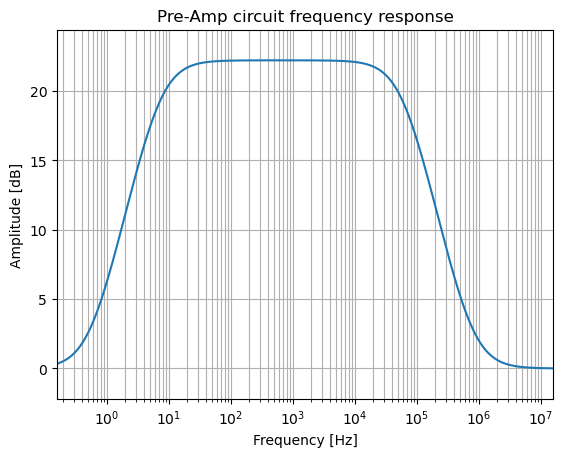

In [33]:
plt.semilogx(f, mag_db)
plt.title('Pre-Amp circuit frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

## Projeto do Circuito

## Circuito LT Spice

### Importando dados

In [34]:
data = pd.read_csv(r".\Circuitos LT Spice\Pre Amp\pre_amplificador_gabriel_mendes.txt", delimiter="\t")

### Conversão do parâmetros

In [35]:
mag_sim = []
for i in data["V(ampout)"]:
    A = np.sqrt(pow(float(i.split(',')[0]), 2) + pow(float(i.split(',')[1]), 2)) # converte de retangular para magnitude
    mag_sim.append(20*np.log10(A))

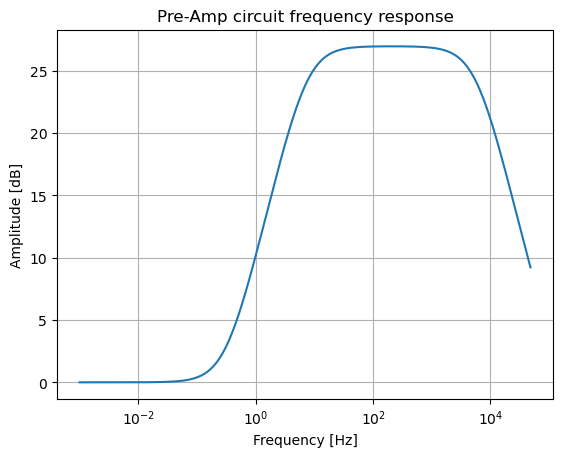

In [36]:
plt.semilogx(data["Freq."], mag_sim) 
plt.xscale('log')
plt.title('Pre-Amp circuit frequency response')
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.show()

## Teórico x Simulado

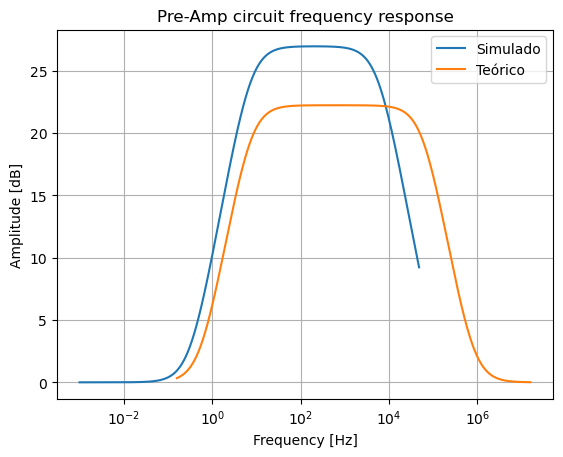

In [37]:
plt.semilogx(data["Freq."], mag_sim, label='Simulado') 
plt.semilogx(f, mag_db, label='Teórico')
plt.xscale('log')
plt.title('Pre-Amp circuit frequency response')
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Amplitude [dB]')
#plt.axvline(Wn/(2*(np.pi)), color='green') # frequência de corte
plt.legend()
plt.grid()
plt.show()